<a href="https://colab.research.google.com/github/nehit210/EDA-on-sports-dataset/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**NAME- Nehit Benara**##
# **THE SPARKS FOUNDATION** #



##**Exploratory Data Analysis - Sports**##

### *   Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier  League’###
### *   As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.###
### *   Suggest teams or players a company should endorse for its products.###






## Importing LIBRARIES:##

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(15,9)

### Loading the Datasets ###

In [55]:
matches=pd.read_csv("/content/matches.csv")
deliveries=pd.read_csv("/content/deliveries.csv")

In [56]:
matches.shape

(756, 18)

In [57]:
deliveries.shape


(179078, 21)

### Merging the datasets 'matches' and 'deliveries' ###

In [61]:
ipl_data= pd.merge(deliveries,matches,left_on='match_id',right_on='id')
ipl_data.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [62]:
ipl_data.drop(["id"],axis=1,inplace=True)
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [63]:
ipl_data.set_index("match_id")

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


## Data Preprocessing##

In [65]:
matches.set_index("id",inplace=True)

In [66]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [67]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

In [69]:
matches[pd.isnull(matches["city"])]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


###Now as we can see the city column for venue Dubai Interational cricket stadium is empty so we will fill it with 'Dubai'###

In [70]:
matches["city"].fillna("Dubai",inplace=True)
matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


###As it is clealy evident that most of the entries of 'umpire3' is null so we'll remove the umpire3 column ###

In [73]:
matches.drop('umpire3',axis=1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [74]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#**EXPLORATORY DATA ANALYSIS**#

##**Visual representation of number of matches played in different cities**##

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

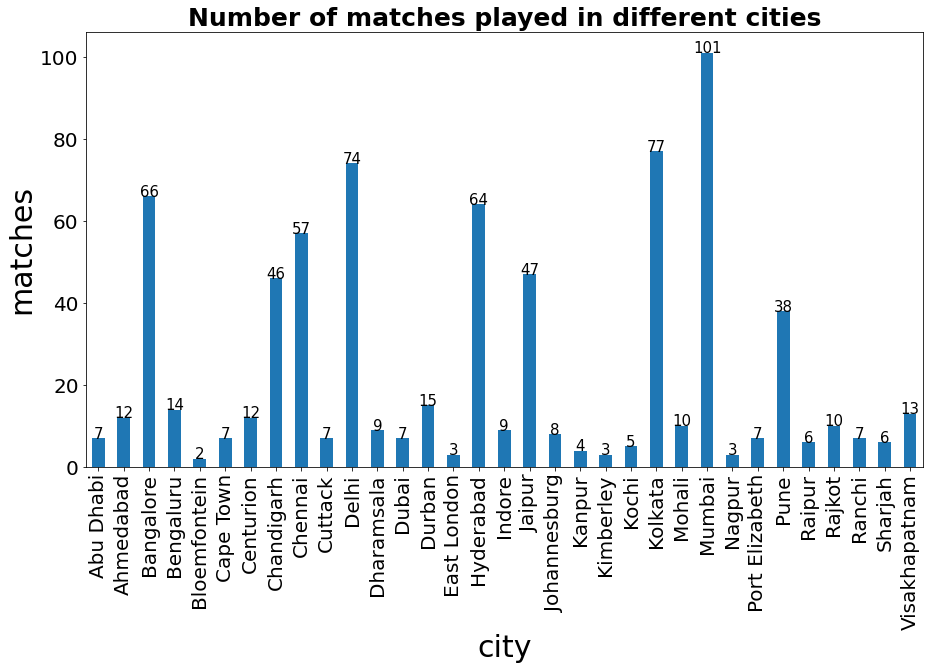

In [75]:
ven=pd.crosstab(matches['city'],matches['venue'])
ven['count']=ven.sum(axis='columns')
v=ven['count']

plt.figure(figsize=(15,8))
v.plot(kind='bar',legend=False)
plt.title("Number of matches played in different cities",fontsize=25,fontweight='bold')
for index,data in enumerate(v):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')
plt.xlabel('city',size=30)
plt.ylabel('matches',size=30)
plt.xticks(size=20)
plt.yticks(size=20)


###**Observations**###

*   Mumbai has hosted the most number of IPL matches followed by Kolkata, Delhi and Bangalore###   
###*   In Overseas cities Durban has hosted the most number of IPL matches



##**Venue which has hosted the most number of IPL matches**##

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

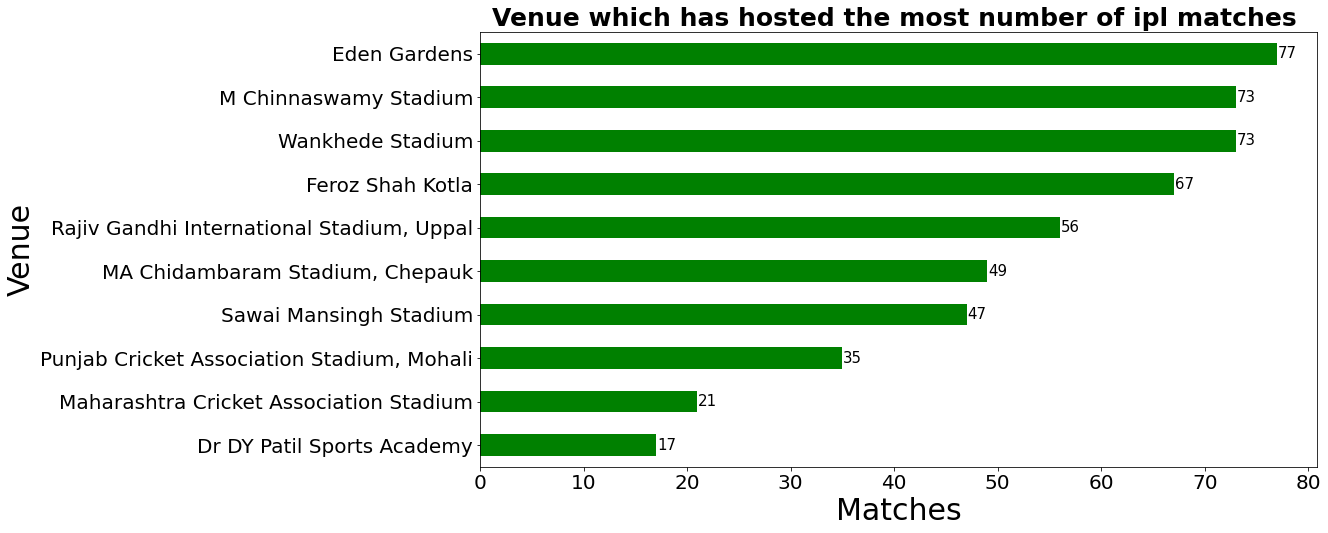

In [76]:
plt.figure(figsize=(15,8))
matches.venue.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh',legend=False,color='green')
plt.title("Venue which has hosted the most number of ipl matches ",fontsize=25,fontweight='bold')
for index,data in enumerate(matches.venue.value_counts().sort_values(ascending=True).tail(10)):
    plt.text(x=data+1 , y =index , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')
plt.ylabel('Venue',size=30)
plt.xlabel('Matches',size=30)
plt.xticks(size=20)
plt.yticks(size=20)

###**Observations**###

*   Eden gardens which is in Kolkata,India is the stadium which has hosted the most number of IPL matches followed by Wankhede Stadium,Mumbai and M chinnaswamy stadium,Bangalore.



##**Decision taken by teams after winning the toss**##

Text(0.5, 1.0, 'Decision taken after winning the toss')

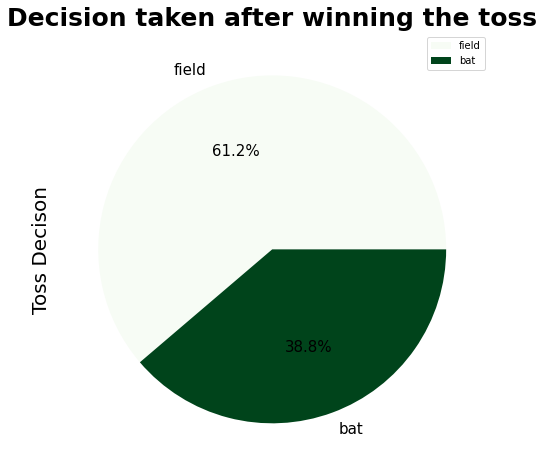

In [77]:
matches['toss_decision'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15,figsize=(20,8),legend=True,cmap='Greens')
plt.ylabel('Toss Decison',fontsize=20)
plt.title('Decision taken after winning the toss',fontsize=25,fontweight='bold')

###**Observation**###


*   As shown in the above pie chart we can say that when a team win the toss most of the time they prefer to chase.





##**Team wise decision to bat or field after winning the toss**##

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


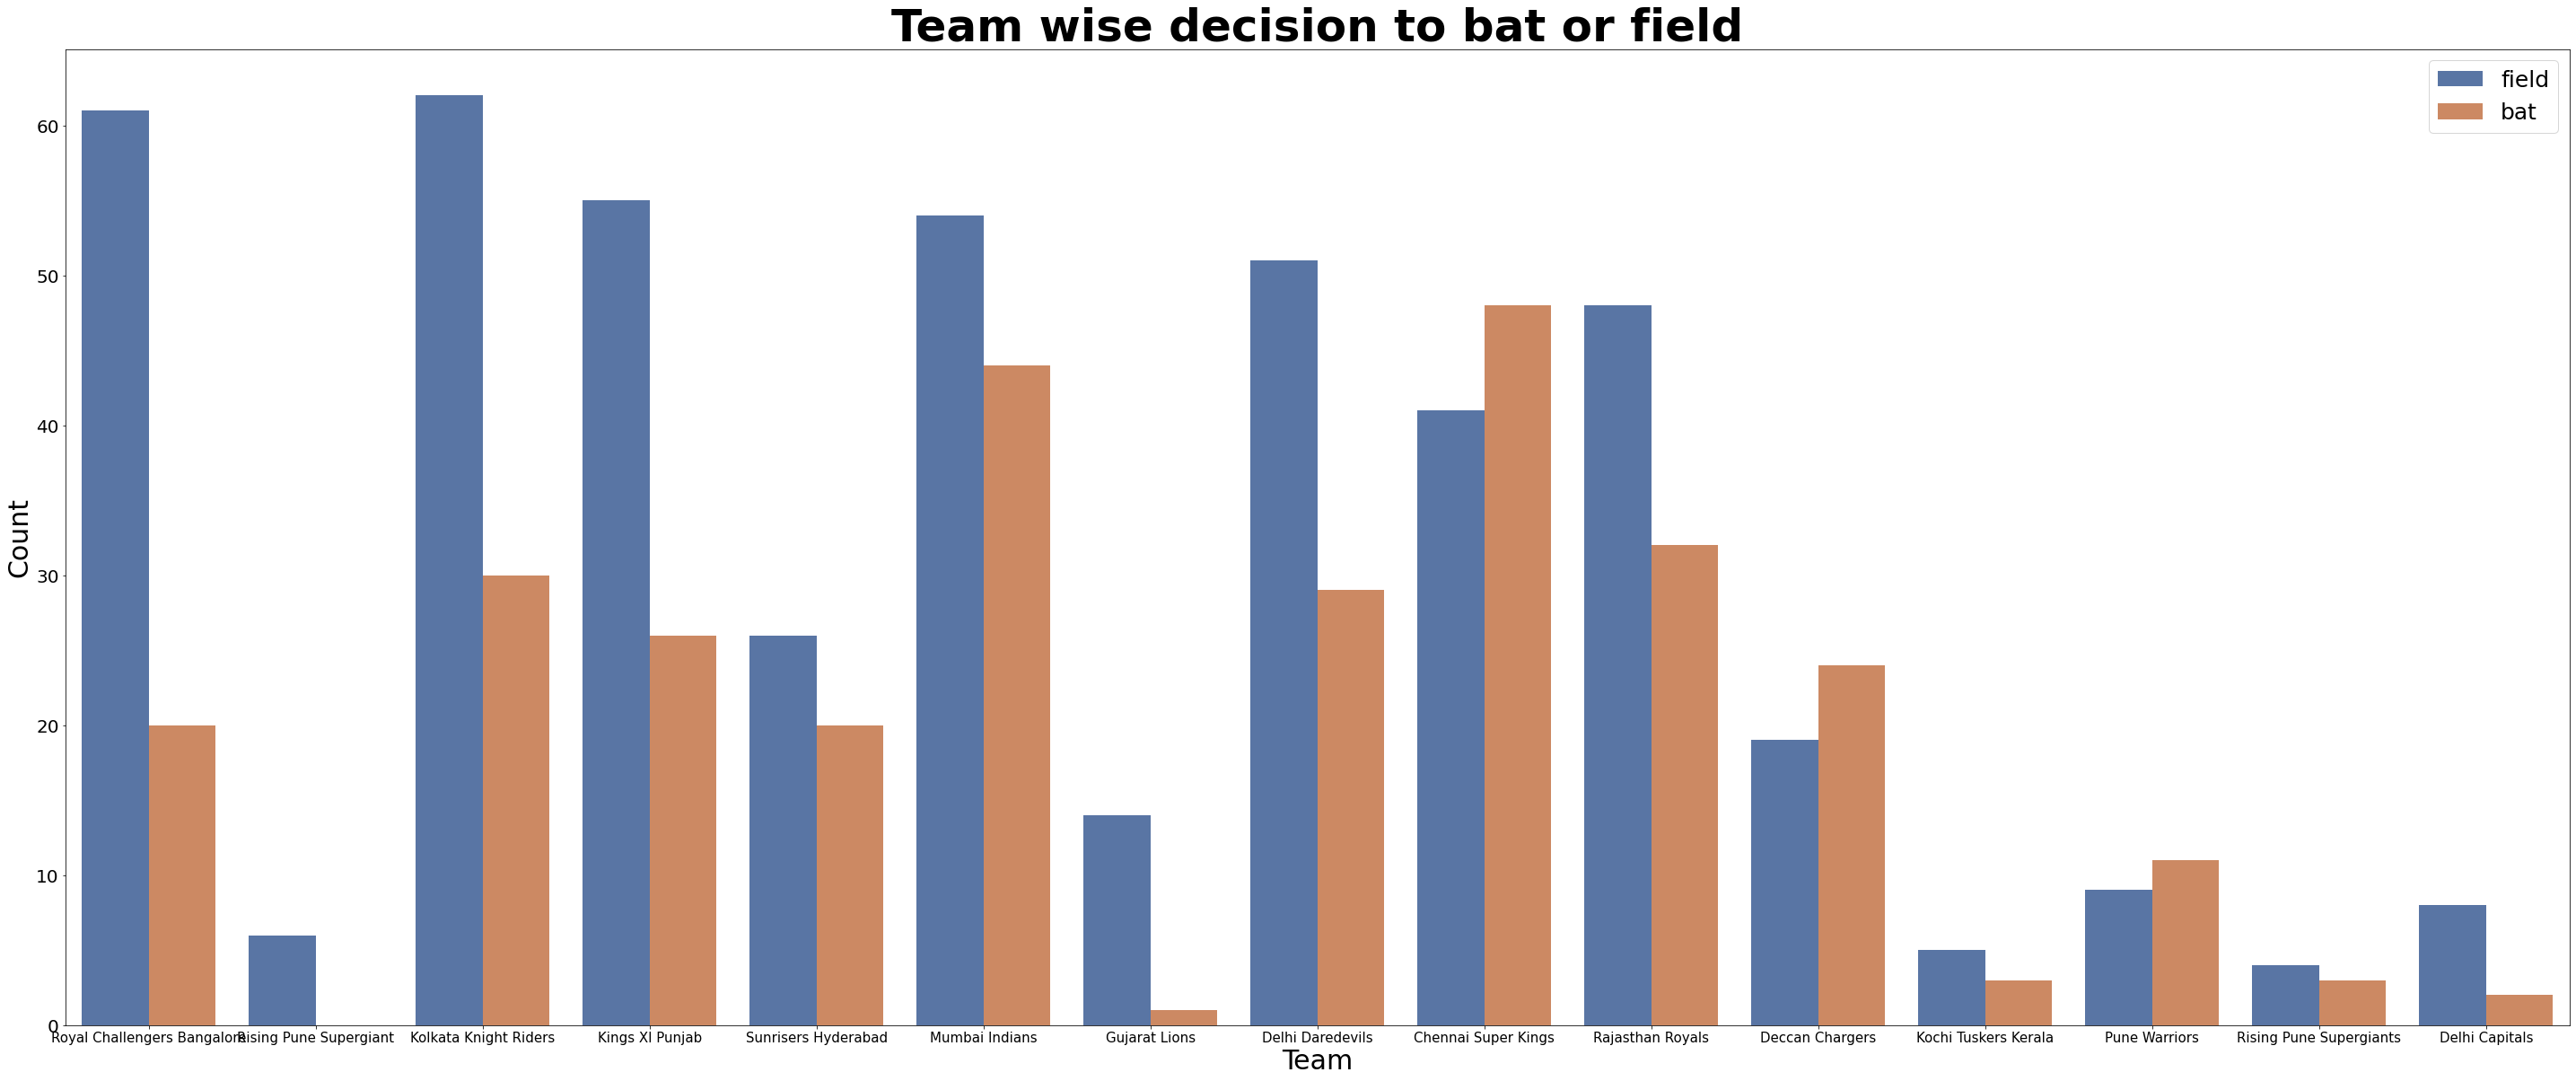

In [78]:
plt.figure(figsize=(50,20))
sns.countplot("toss_winner",data=matches,hue='toss_decision',palette='deep')
plt.title("Team wise decision to bat or field",fontsize=50,fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=20)
plt.xlabel("Team",fontsize=30);
plt.ylabel("Count",size=30);
plt.legend( prop={'size': 25})

##**Observations**##


*   Most of the teams like Royal challengers bangalore, Kolkata Knight Riders, Kings XI Punjab, Mumbai Indians choose to field after winner the toss. 
*   It can be said that most of the teams are confident about their batting lineup and likes to chase whatever target they face.


*   The teams Chennai Super Kings and Deccan Chargers(now Sunrisers hyderabad) likes to defend the target and therefore after winning the toss they choose to bat.





##**Teams who won the toss as well as the match**##

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

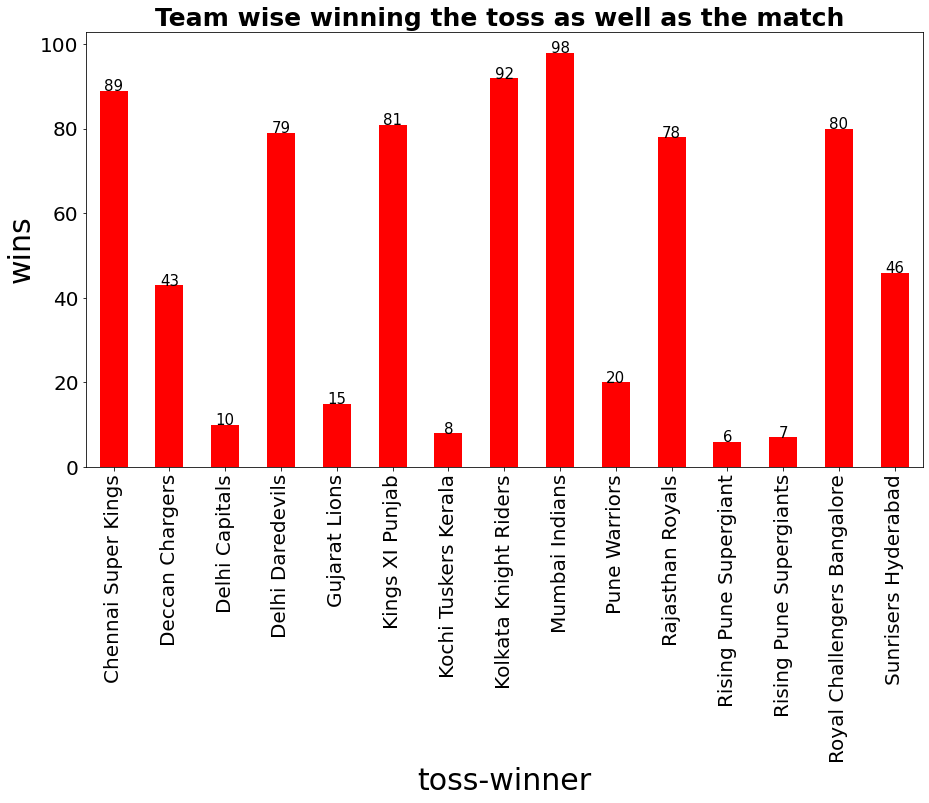

In [79]:
win=pd.crosstab(matches['toss_winner'],matches['winner'])
win['count']=win.sum(axis='columns')
w=win['count']

plt.figure(figsize=(15,8))
w.plot(kind='bar',legend=False,color='red')
plt.title("Team wise winning the toss as well as the match ",fontsize=25,fontweight='bold')
for index,data in enumerate(w):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')
plt.xlabel('toss-winner',size=30)
plt.ylabel('wins',size=30)
plt.xticks(size=20)
plt.yticks(size=20)


###**Observations**###


*   Mumbai Indians is the team which has won most of the matches after winning the toss which means that their decision of batting or fielding after winning the toss is correct almost all the time.
*   Kolkata Knight Riders and Chennai Super Kings are the other teams which have won many matches after winning the toss.



##**Teams with most number of wins in IPL**##

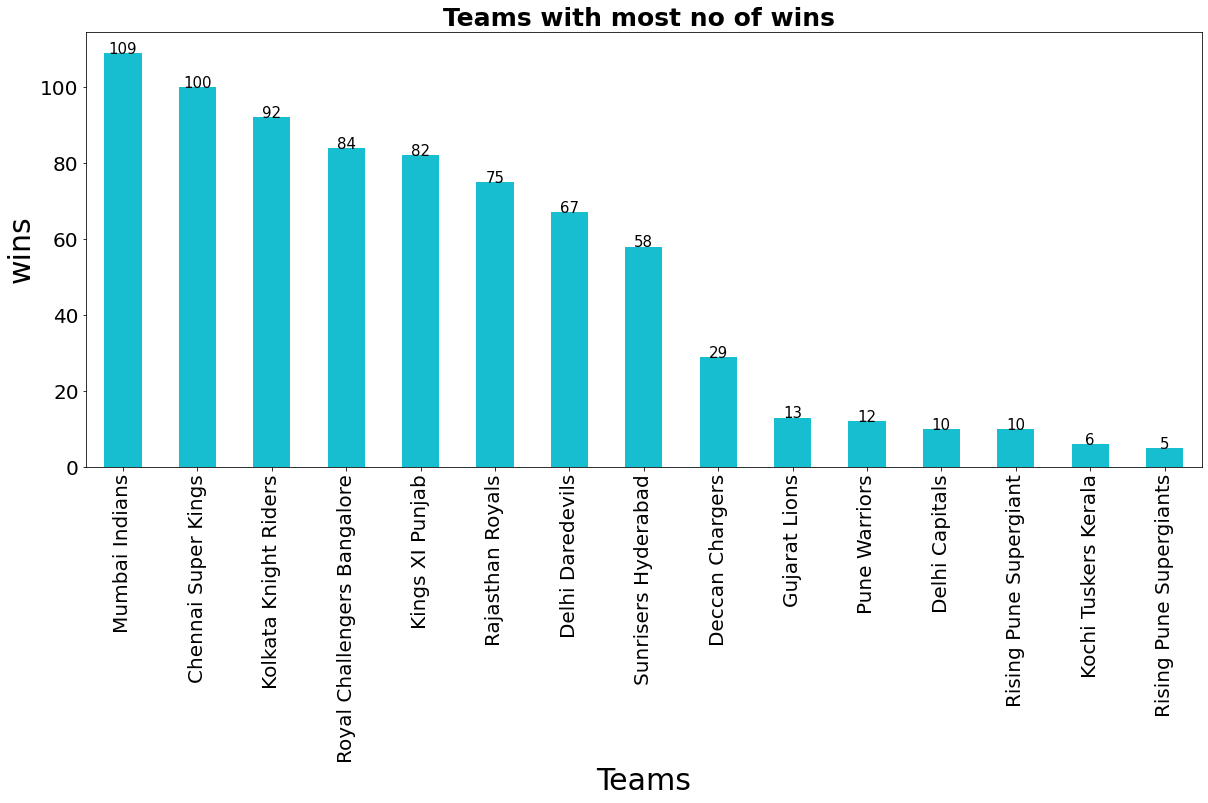

In [80]:
win=pd.DataFrame({'winner':matches['winner']})
plt.figure(figsize=(15,8))
plt.title("Teams with most no of wins ",fontsize=25,fontweight='bold')
plt.xlabel('Teams',size=30)
plt.ylabel('wins',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
win['winner'].value_counts().plot(kind='bar',figsize=(20,8),color='tab:cyan')
for index,data in enumerate(win['winner'].value_counts()):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')

###**Observations**###


*   It shows that Mumbai Indians has been the most successful team as it has won the most number of matches followed by Chennai Super Kings and Kolkata Knight Riders.




In [81]:
player=matches['player_of_match'].value_counts()
player.head(20)

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
V Kohli           12
MEK Hussey        12
DR Smith          11
AD Russell        11
A Mishra          11
V Sehwag          11
JH Kallis         10
KA Pollard        10
SE Marsh           9
SP Narine          9
Name: player_of_match, dtype: int64

The table above shows the top 20 players with the most man of the match awards

##**Visualisation of the Top 10 players with most man of the match awards**##

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text major ticklabel objects>)

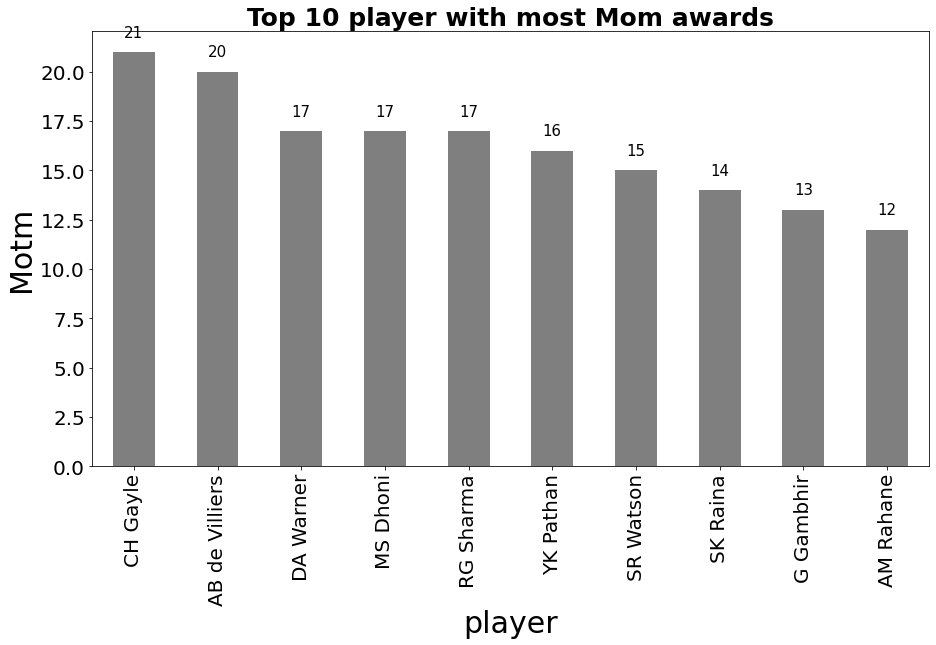

In [82]:
plt.figure(figsize=(15,8))
player.head(10).plot(kind='bar',legend=False,color='tab:gray')
plt.title("Top 10 player with most Mom awards",fontsize=25,fontweight='bold')
for index,data in enumerate(player.head(10)):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')
plt.xlabel('player',size=30)
plt.ylabel('Motm',size=30)
plt.xticks(size=20)
plt.yticks(size=20)

###**Observations**###


*   Christopher henry gayle is the player who has received the man of the match award most number of times i.e, 21 and followed by Ab devilliers(20) 
*   From the above visualisation as we can se there are no bowlers in the top 10 which clearly shows that IPL is dominated by batsmans.



##**Teams winning or losing while chasing**##

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


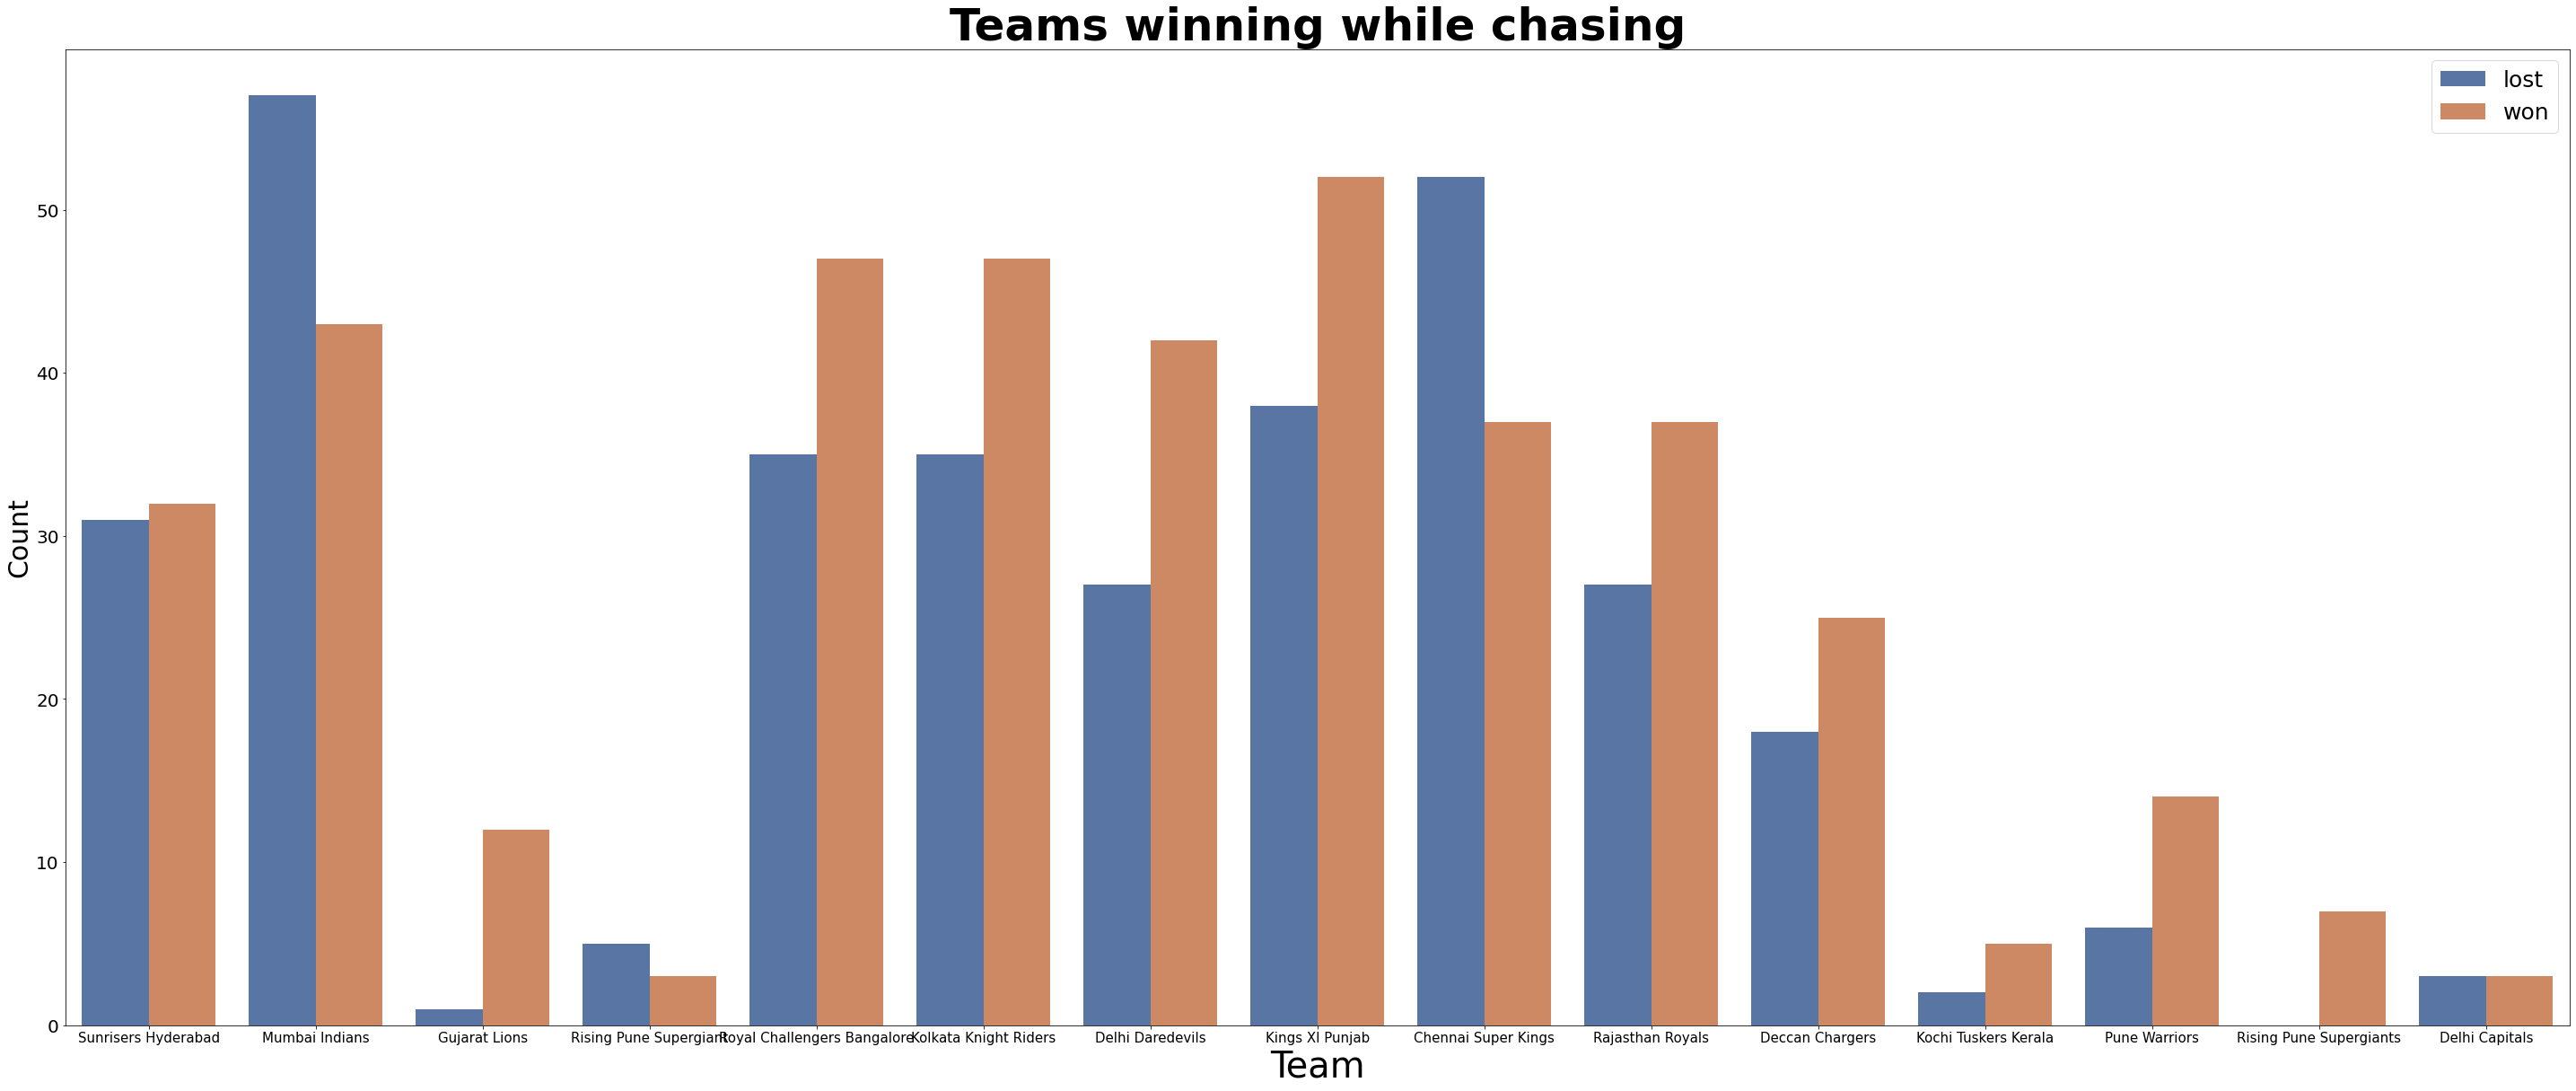

In [83]:
match1=matches[matches['result']=='normal']
match1['win_while_chasing']=np.where((match1.win_by_wickets>0),'won','lost')
plt.figure(figsize=(50,20))
sns.countplot("team1",data=match1,hue='win_while_chasing',palette='deep')
plt.title("Teams winning while chasing",fontsize=50,fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=20)
plt.xlabel("Team",fontsize=40);
plt.ylabel("Count",size=30);
plt.legend( prop={'size': 25})

###**Observations**###


*   Royal challengers Bangalore, Kolkata knight riders,Kings XI Punjab,Rajasthan royals are the teams which have won more matches while chasing which makes it clear why they opt to field after winning the toss.
*   Mumbai Indians,Chennai Super Kings are the team which have lost more matches while chasing which is why chennai super kings opt to bat after winning the toss.



##**Team winning or losing while defending**##

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


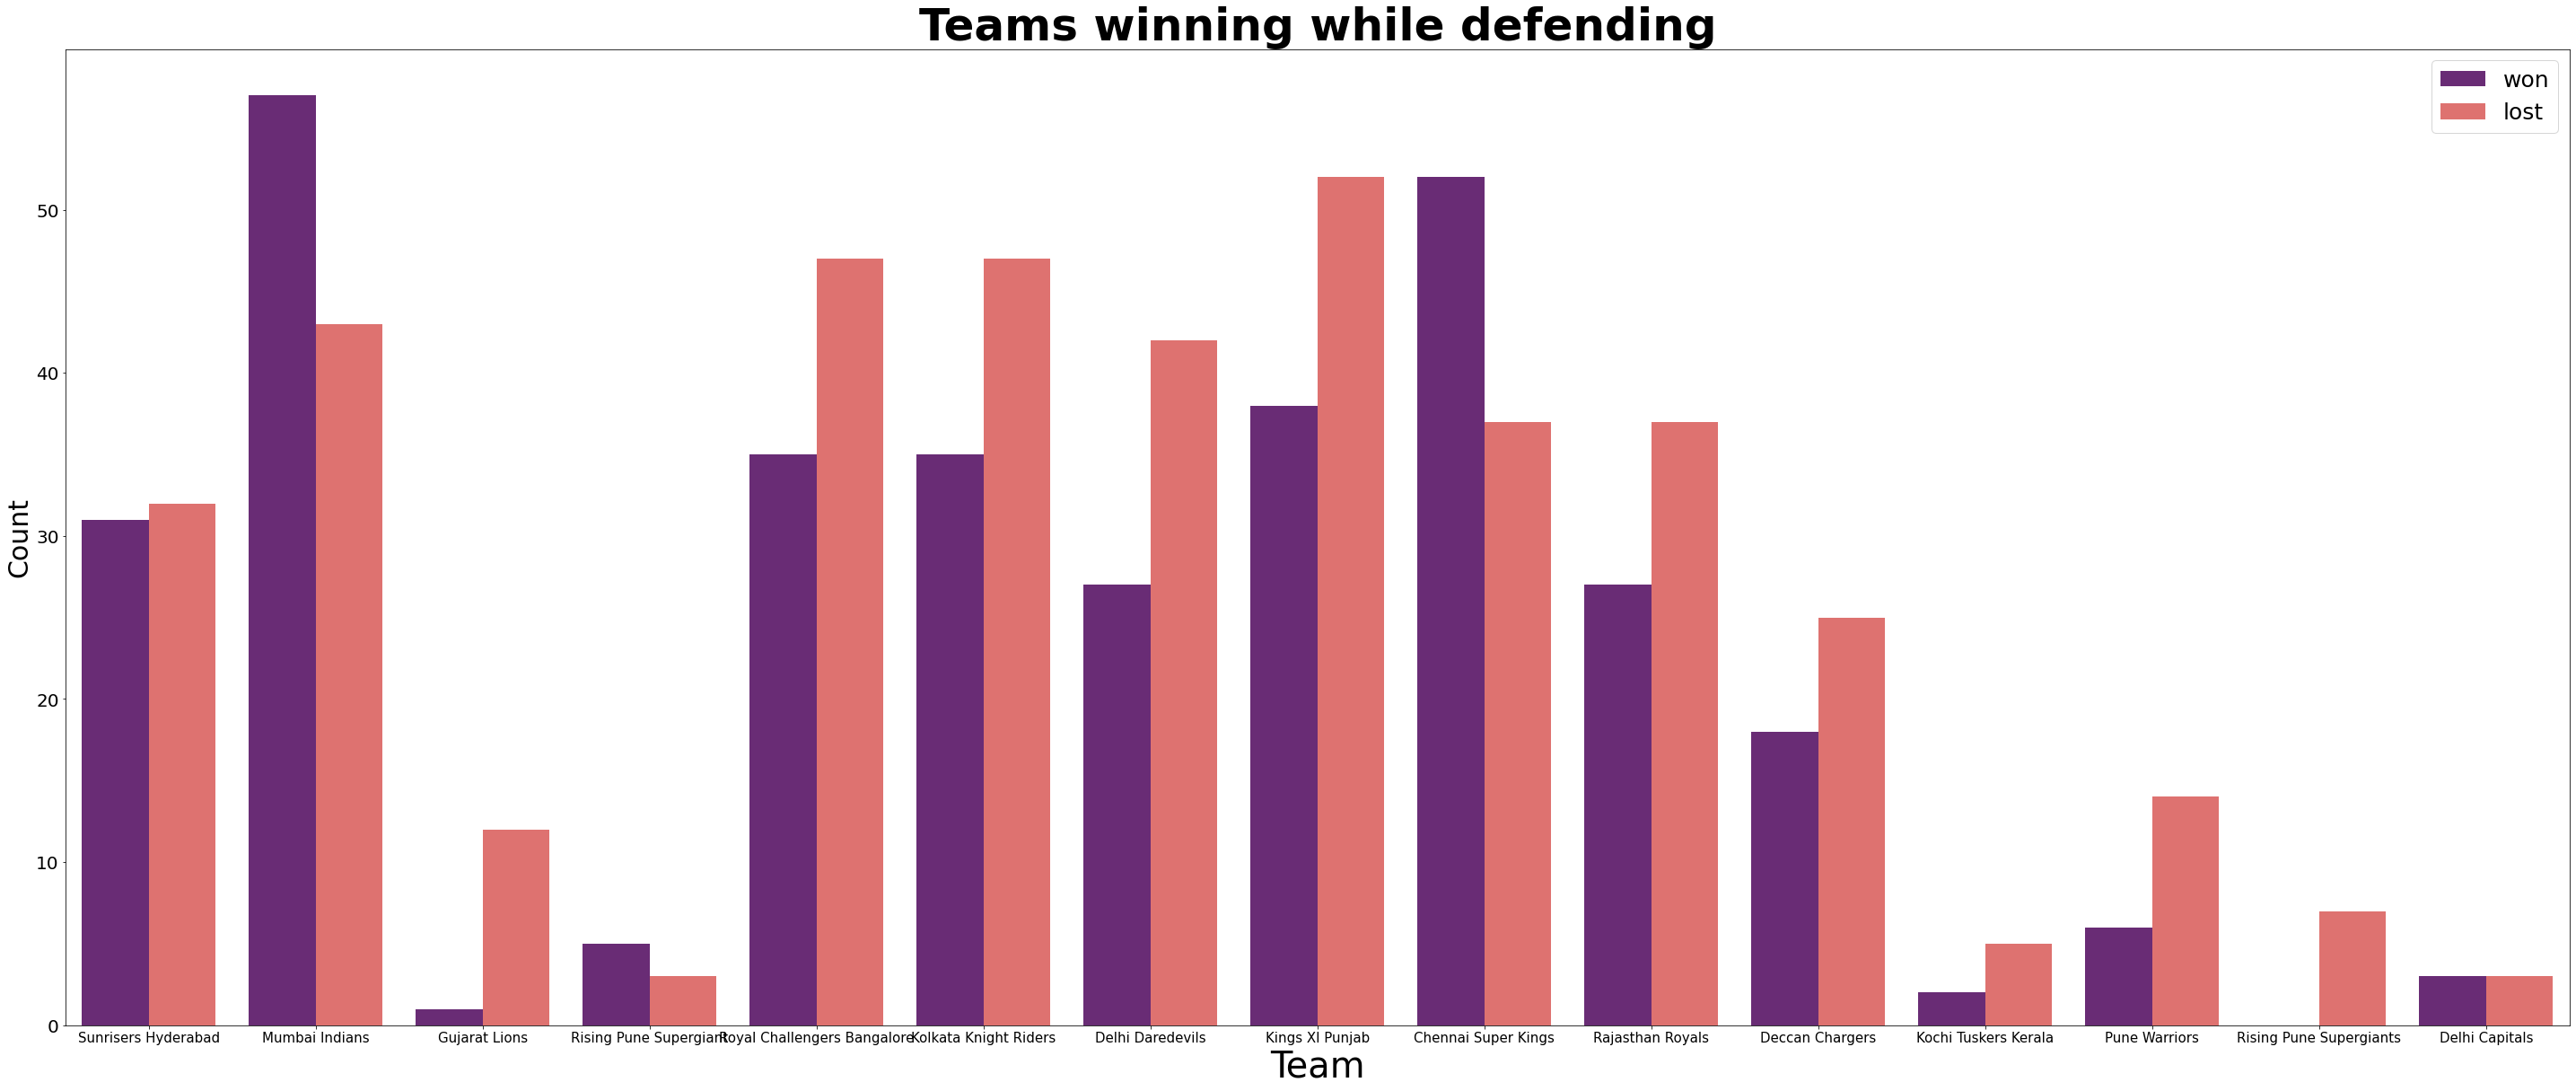

In [84]:
match2=matches[matches['result']=='normal']
match2['win_while_defending']=np.where((match2.win_by_runs>0),'won','lost')
plt.figure(figsize=(50,20))
sns.countplot("team1",data=match2,hue='win_while_defending',palette='magma')
plt.title("Teams winning while defending",fontsize=50,fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=20)
plt.xlabel("Team",fontsize=40);
plt.ylabel("Count",size=30);
plt.legend( prop={'size': 25})

###**Observations**###


*   Mumbai Indians and Chennai Super Kings are the two teams which are too good in defending ans it is evident enough seeing the above visualisation.




##**Runs scored over the years**##

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 <a list of 8 Text major ticklabel objects>)

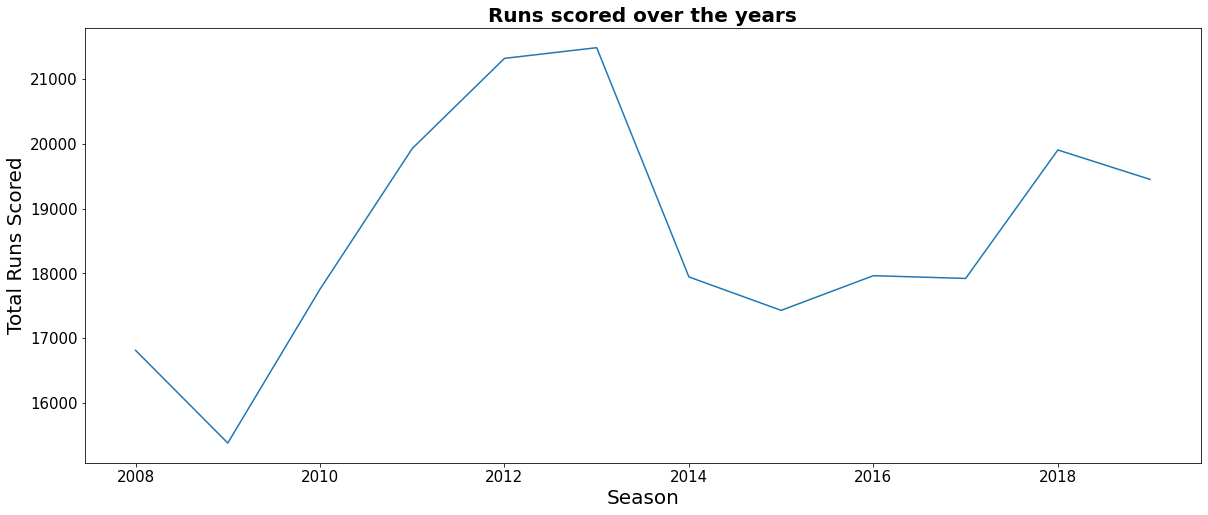

In [85]:
ipl_data.groupby('season')['batsman_runs'].sum().plot(kind='line',figsize=(20,8))
plt.title("Runs scored over the years",fontsize=20,fontweight='bold')
plt.xlabel("Season",size=20)
plt.ylabel("Total Runs Scored",size=20)
plt.xticks(size=15)
plt.yticks(size=15)

###**Observations**###


*   As from the above line graph it can be said that the 2013 season was the most competitive one as ample amount of runs were scored in that season.
*   IPL season 2009 can be said as slow or bowlers IPL as very few runs were scored in this season.



##**Top run getters in IPL**##

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

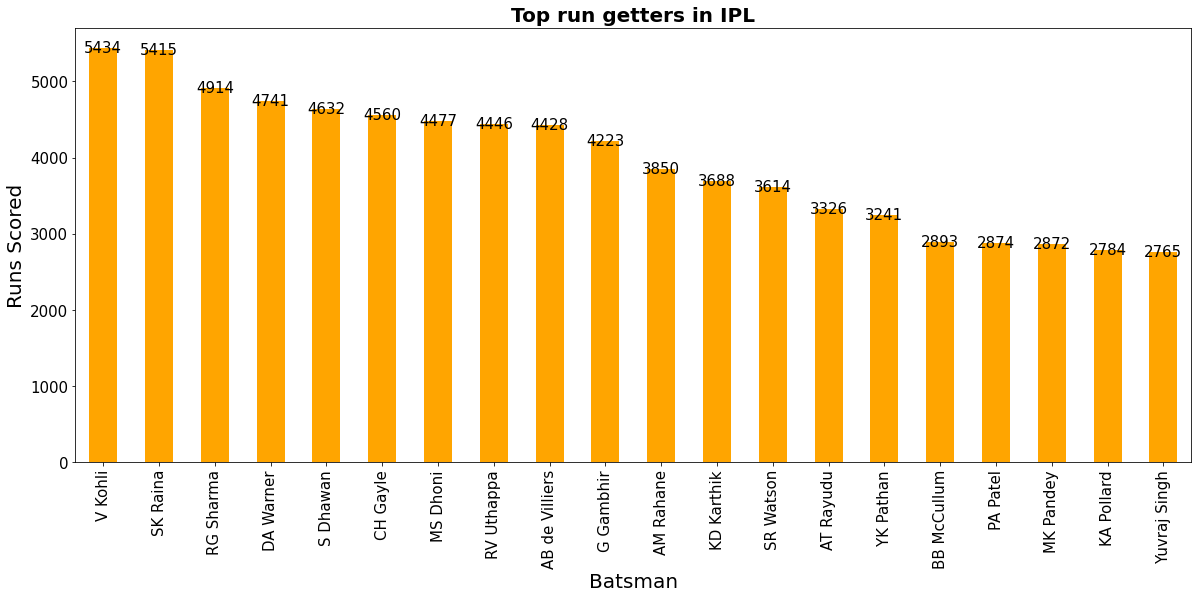

In [86]:
ipl_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(20).plot(kind='bar',color='orange',figsize=(20,8))
for index,data in enumerate(ipl_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(20)):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')
plt.title("Top run getters in IPL",fontsize=20,fontweight='bold')
plt.xlabel("Batsman",size=20)
plt.ylabel("Runs Scored",size=20)
plt.xticks(size=15)
plt.yticks(size=15)

###**Observations**###


1.   Virat Kohli is the highest run getter of the IPL followed by suresh raina and rohit sharma.
2.   There is only one overseas player in the top 5 run getters of IPL.



##**Batsman with the highest strike rate over the years**##

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

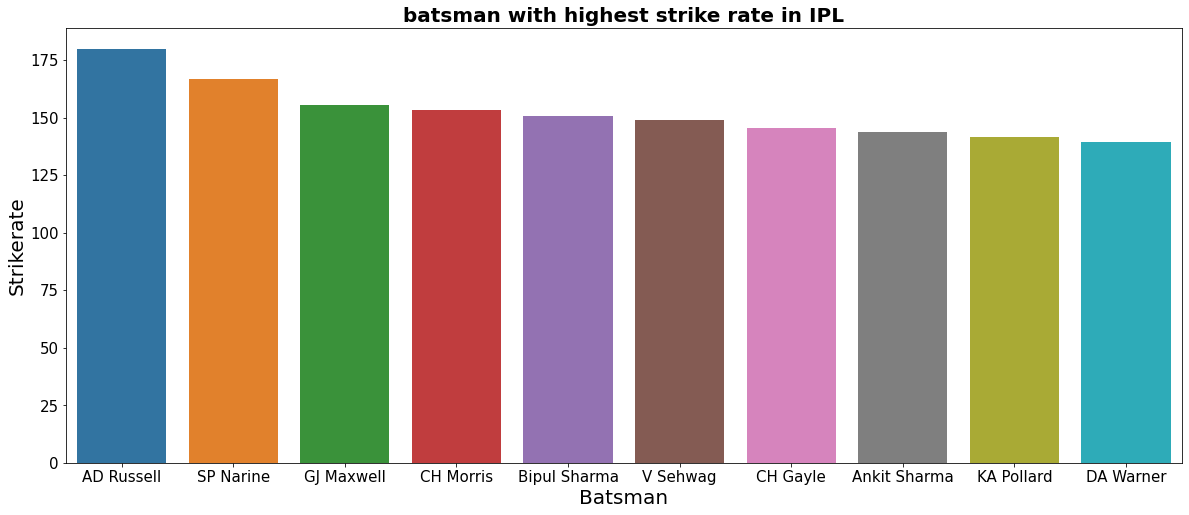

In [87]:
balls=pd.DataFrame(ipl_data.groupby('batsman')['ball'].count())
runs=pd.DataFrame(ipl_data.groupby('batsman')['batsman_runs'].sum())
season=pd.DataFrame(ipl_data.groupby('batsman')['season'].nunique())
batting_sr=pd.DataFrame({'balls':balls['ball'],'run':runs['batsman_runs'],'season':season['season']})
batting_sr.reset_index(inplace=True)
batting_sr['strike_rate']=batting_sr['run']/batting_sr['balls']*100
batting_strike=batting_sr[batting_sr.season.isin([6,7,8,9,10,11])][['season','batsman','strike_rate']]
plt.figure(figsize=(20,8))
batting_strike=batting_strike.sort_values(['strike_rate'],ascending=False)
sns.barplot(x='batsman',y='strike_rate',data=batting_strike.head(10))
plt.title("batsman with highest strike rate in IPL",fontsize=20,fontweight='bold')
plt.xlabel("Batsman",size=20)
plt.ylabel("Strikerate",size=20)
plt.xticks(size=15)
plt.yticks(size=15)


###**Observations**###


*   Above are the top 10 batsman who have the best strike rate from the last six seasons.
*   AD Russell has the highest batting strike among the other which makes him a power packed batsman and a nightmare for the bowling team followed by SP Narine and GJ Maxwell



##**Wicket taken over the years**##

(array([650., 700., 750., 800., 850., 900., 950.]),
 <a list of 7 Text major ticklabel objects>)

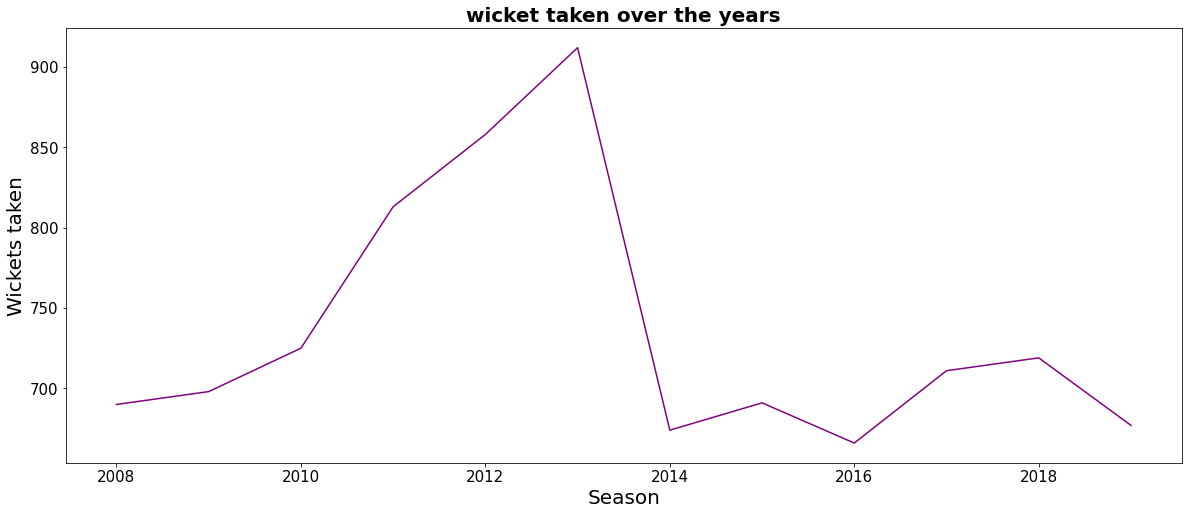

In [88]:
ipl_data.groupby('season')['player_dismissed'].count().plot(kind='line',color='purple',figsize=(20,8))
plt.title("wicket taken over the years",fontsize=20,fontweight='bold')
plt.xlabel("Season",size=20)
plt.ylabel("Wickets taken",size=20)
plt.xticks(size=15)
plt.yticks(size=15)

###**Observations**###


*   As shown in the above line graph 2013 was quite a competitive year as many wickets were fallen that year.
*   Season 2014 and 2016 were somewhat dominated by batsmans as very few wickets were taken in these seasons. 



##**Top Wicket takers in IPL**##


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

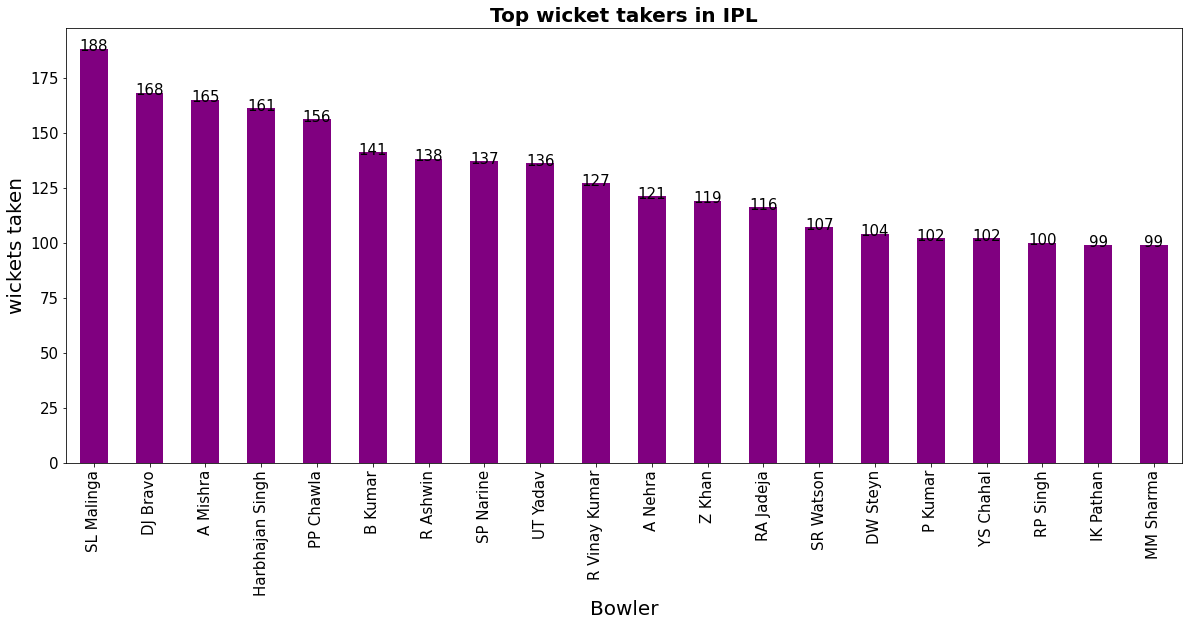

In [89]:
ipl_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(20).plot(kind='bar',color='purple',figsize=(20,8))
for index,data in enumerate(ipl_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(20)):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')
plt.title("Top wicket takers in IPL",fontsize=20,fontweight='bold')
plt.xlabel("Bowler",size=20)
plt.ylabel("wickets taken",size=20)
plt.xticks(size=15)
plt.yticks(size=15)

###**Observations**###


*   SL Malinga is the highest wicket taker among all with a total of 188 wickets.
*   According to the above graph SL Malinga completely dominated as the secong highest wicket taker(DJ Bravo) has almost 20 less wickets than him.
*   We can also see that among the top 20 wicket takers domination is among the medium and fast bowlers.



##**Bowlers with best strike rate over the years**##

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

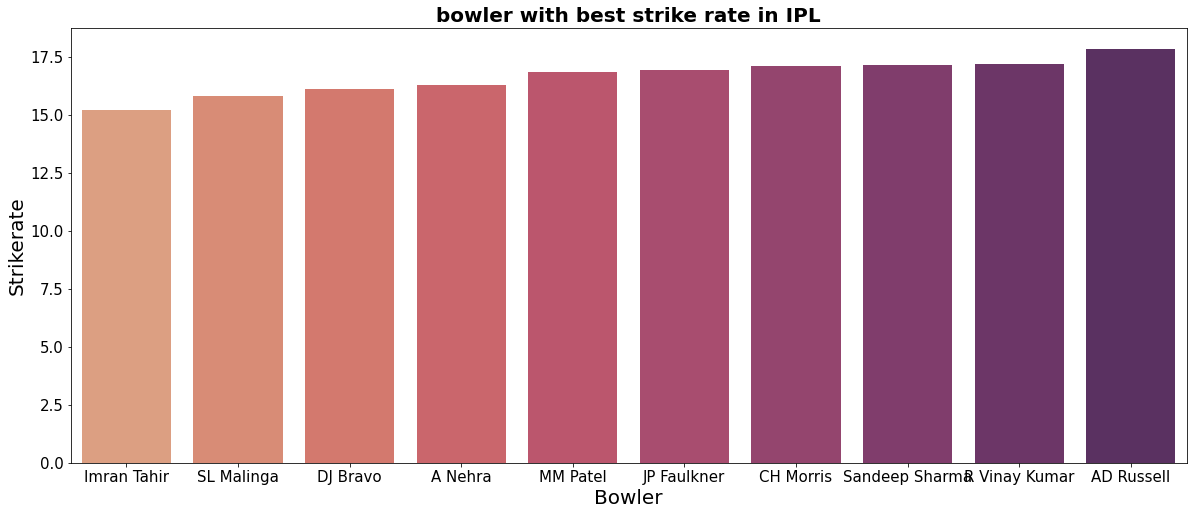

In [90]:
balls=pd.DataFrame(ipl_data.groupby('bowler')['ball'].count())
wickets=pd.DataFrame(ipl_data[ipl_data['dismissal_kind']!='no_dismissal'].groupby('bowler')['dismissal_kind'].count())
season=pd.DataFrame(ipl_data.groupby('bowler')['season'].nunique())
bowling_sr=pd.DataFrame({'balls':balls['ball'],'wickets':wickets['dismissal_kind'],'season':season['season']})
bowling_sr.reset_index(inplace=True)
bowling_sr['strike_rate']=bowling_sr['balls']/bowling_sr['wickets']
bowling_strike=bowling_sr[bowling_sr.season.isin([6,7,8,9,10,11])][['season','bowler','strike_rate']]
plt.figure(figsize=(20,8))
bowling_strike=bowling_strike.sort_values(['strike_rate'],ascending=True)
sns.barplot(x='bowler',y='strike_rate',data=bowling_strike.head(10),palette='flare')
plt.title("bowler with best strike rate in IPL",fontsize=20,fontweight='bold')
plt.xlabel("Bowler",size=20)
plt.ylabel("Strikerate",size=20)
plt.xticks(size=15)
plt.yticks(size=15)


###**Observations**###


*   Imran Tahir has the best strike amog the bowlers.
*   The next are SL Malinga and DJ Bravo who were the top 2 wicket takers which shows that these two are the best bowlers in IPL.
*   Among the best strike we can see most of them are the medium and fast bowlers which we also saw in the wicket takers tally which shows the domination of fast bowlers in IPL.



##**Fielders with most dismissals**##

In [91]:
field=pd.DataFrame({'fielder':ipl_data['fielder']})
field.dropna()

,fielder
11,Mandeep Singh
64,Sachin Baby
94,Sachin Baby
165,DA Warner
199,BCJ Cutting
...,...
178977,Q de Kock
179019,Q de Kock
179033,Ishan Kishan
179067,Q de Kock


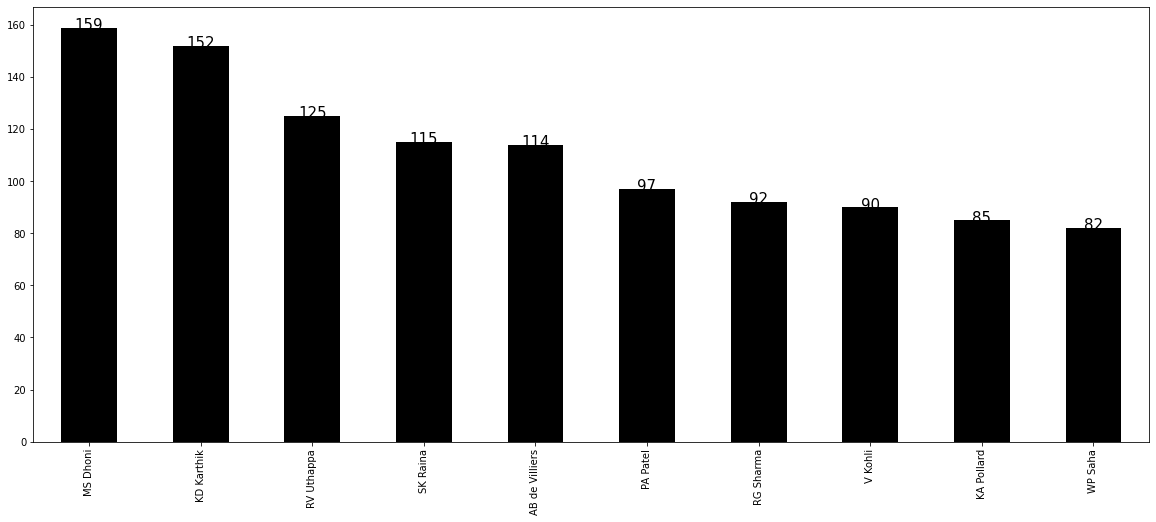

In [92]:
field['fielder'].value_counts().head(10).plot(kind='bar',figsize=(20,8),color='black')
for index,data in enumerate(field['fielder'].value_counts().head(10)):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), horizontalalignment='center',
                verticalalignment='center')

###**Observations**###


*   MS Dhoni tops the list with the highest number of dismissals
*   We can see the top 3 are the keeps in the highest number of dismissals.
*   SK Raina has the highest number of dismissals as a fielder followed by AB de Velliers.
*   We can say that MS Dhoni is the best keeper of the IPL and SK Raina and AB de villiers are the best fielders in IPL.



##**As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**##



*   Mumbai Indians is the most successful team in IPL. It has won the most number of matches(109) as well as the most number of toss(98).
*   The other teams which have performed well are Chennai Super Kings, Royal Challengers bangalore and Kolkata Knight Riders.
*   Eden Gardens,Kolkata has hosted the most number of IPL matches.
*   There is a high chance of winning if a team fields first as most of the teams are good in chasing.
*    Chris Gayle has won the maximum umber of player of the match awards(21).
*    There is a high chance of winning the match if a team wins the toss. 



##**Suggest teams or players a company should endorse for its products.**##


*   The teams which a company should endorse for its proucts are Mumbai indians, Chennai Super Kings, Royal Challengers Bangalore and Kolkata Knight Riders.
*   The players which a company can endorse if they are looking for a batsman are CH Gayle, Virat Kohli, AD Russell, SK Raina, RG Sharma, AB De villiers, DA warner.
*    The players which a company can endorse if they are looking for a bowler are SL Malinga, DJ bravo, A Nehra, Imran Tahir, Amit Mishra, harbhajan singh.
*   Other players to look out for are MS Dhoni, KD karthik, RV Uthappa, SR Watson, YK Pathan.

